CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 4 index: effectiveness, popularity, complexity and improvement. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [2043]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

<b>Data select:</b>
<ul>
    <li>Num Game</li>
    <li>Perf Rating</li>
    <li>Avg Player Rating</li>
    <li>Player Win %</li>
    <li>Draw %</li>
    <li>Opponent Win %</li>
    <li>Number of moves</li>
</ul>

<ol>
<li>
Popularity indicator:
    <ul>
    <li>Num Games: How frequently the opening is used.</li>
    </ul>
</li>
<li>
Effectivness indicator:
    <ul>
    <li>Player Win % 
    <li>Draw %</li>
    <li>Opponent Win %</li> 
     =>Direct outcomes when the opening is used.
    </ul>
</li>
<li>
    Improvement indicator:
    <ul>
    <li>perf : delta between player Rating and his performance rating</li>
    </ul>
</li>
<li>
Complexity indicator:
    <ul>
    <li>Number of moves: The length and complexity of the opening moves can indicate strategic depth.</li>
    <li>Number of variations: The number of possible move sequences can reflect the complexity of the opening.</li>
    </ul>
</li>
</ol>

In [2044]:
# add a column to the dataframe
df['Num Moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# # add the data last_played, a number of days since the last played game
# df['Last Played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [2045]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','Num Moves']

df = df[selected_variable]

# print(df.head())

# Split the 'Opening' column into 'Opening Name' and 'Variation' based on the first comma
df[['Opening Name', 'Variation']] = df['Opening'].str.split(',', n=1, expand=True)

# print(df.sample(5))

# Strip any leading or trailing whitespace characters that may have appeared from the split
df['Opening Name'] = df['Opening Name'].str.strip()
df['Variation'] = df['Variation'].str.strip()

# Group by 'Opening Name' and aggregate the data
# For numeric columns like 'Num Games', 'Perf Rating', etc., you can sum or average them
# Count the number of variations for each opening
aggregated_data = df.groupby('Opening Name').agg({
    'Num Games': 'sum',
    'Perf Rating': 'mean',
    'Avg Player': 'mean',
    'Player Win %': 'mean',
    'Draw %': 'mean',
    'Opponent Win %': 'mean',
    'Num Moves': 'mean',
    'Variation': 'count'  # Counts the number of variations
}).rename(columns={'Variation': 'Num Variations', 'Num Moves': 'Avg Num Moves'})

# If number of variations is 0, set it to 1
aggregated_data['Num Variations'] = aggregated_data['Num Variations'].apply(lambda x: x if x > 0 else 1)

# calculate the delta variation betwenn the Avg Player and the Perf Rating
aggregated_data['DeltaPerf'] = aggregated_data['Perf Rating'] - aggregated_data['Avg Player']

# Change the number of game to a pourcentage of the total number of games
# aggregated_data['Num Games'] = aggregated_data['Num Games'] / aggregated_data['Num Games'].sum() 

# Reset index to make 'Opening Name' a column again
aggregated_data.reset_index(inplace=True)

# Save the modified dataframe to a new CSV file or continue analysis
aggregated_data.to_csv('archive/cleaned_openings.csv', index=False)

print(aggregated_data.sample(5))
print(aggregated_data.info())

data = pd.read_csv('archive/cleaned_openings.csv')



              Opening Name  Num Games  Perf Rating   Avg Player  Player Win %  \
9         Budapest Defense       7777  2162.333333  2160.500000     38.050000   
6   Blackmar-Diemer Gambit       1019  2071.833333  2116.500000     37.133333   
59          Polish Defense       1067  2093.000000  2168.000000     31.000000   
69  Queen's Indian Defense      57417  2356.317073  2352.560976     32.602439   
46         Mikenas Defense       1696  2214.000000  2230.500000     37.450000   

       Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  
9   23.566667       38.383333       7.166667               6   1.833333  
6   20.350000       42.533333       8.166667               6 -44.666667  
59  22.200000       46.800000       2.000000               1 -75.000000  
69  38.080488       29.329268      10.878049              41   3.756098  
46  23.900000       38.650000       4.000000               1 -16.500000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92

In [2046]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate:", data.duplicated().sum())

Opening Name      0
Num Games         0
Perf Rating       0
Avg Player        0
Player Win %      0
Draw %            0
Opponent Win %    0
Avg Num Moves     0
Num Variations    0
DeltaPerf         0
dtype: int64

Number of duplicate: 0


In [2047]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the data

data['Log Num Games'] = np.log1p(data['Num Games']) 

# List of columns to normalize
columns_to_normalize = ['Perf Rating', 'Player Win %', 'Log Num Games','Avg Player' , 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf']

# Apply Standard scaling
# scaler = StandardScaler()
# data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Apply Min-Max scaling
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Show the head of the DataFrame to verify normalization
print(data.head())


# Reverse the Opponent Win % normalization because a lower opponent win rate is better for the opening
data['Opponent Win %'] = 1 - data['Opponent Win %']

# Reverse the Num Moves normalization because a lower number of moves is better
data['Avg Num Moves'] = 1 - data['Avg Num Moves']

# Reverse the Num Variations normalization because a lower number of variations is better
data['Num Variations'] = 1 - data['Num Variations']

print(data.head(5))

# Save the normalized DataFrame to a new CSV file
data.to_csv('archive/normalized_data.csv', index=False)

# In normalized_data, remove the columns that are not normalized
data = pd.read_csv('archive/normalized_data.csv')

        Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
0   Alekhine Defense      34710     0.678743    0.638972      0.557756   
1  Anderssen Opening       1308     0.512389    0.474576      0.540594   
2       Benko Gambit      24543     0.752347    0.680547      0.716249   
3     Benoni Defense      56840     0.788900    0.753739      0.623861   
4       Bird Opening      16315     0.431120    0.407976      0.653069   

     Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  \
0  0.458495        0.436635       0.479590        0.098859   0.550837   
1  0.411314        0.486822       0.000000        0.000000   0.541401   
2  0.394401        0.362244       0.693617        0.060837   0.654552   
3  0.434875        0.403488       0.754149        0.148289   0.538217   
4  0.309085        0.478140       0.202553        0.015209   0.492994   

   Log Num Games  
0       0.655656  
1       0.286399  
2       0.616611  
3       0.711217  
4       0.570612  
  

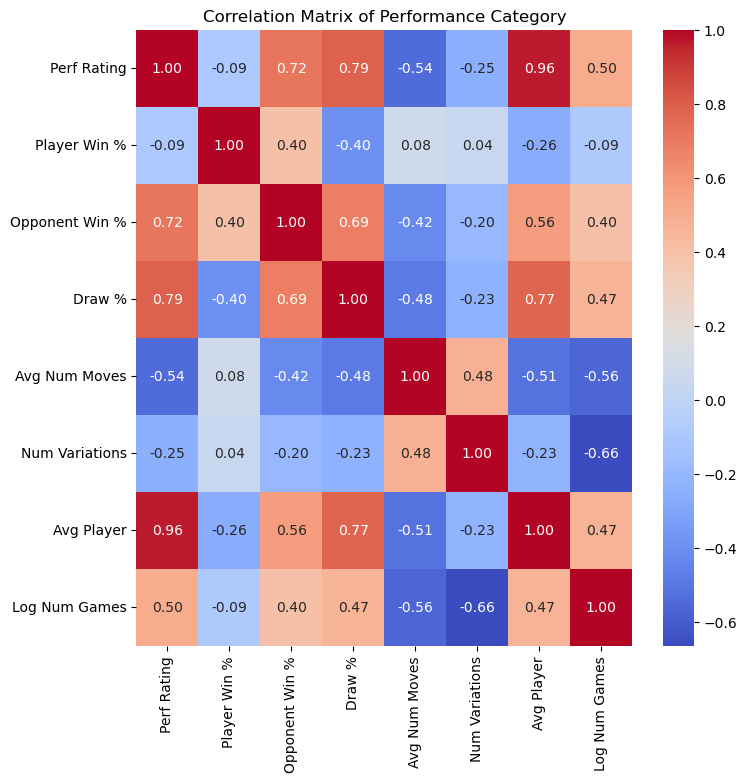

In [2048]:
# scatter plot on the variables from the performance category

import seaborn as sns
import matplotlib.pyplot as plt

# Select the normalized columns
normalizes_data = data[['Perf Rating', 'Player Win %', 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'Avg Player', 'Log Num Games']]

# Calculate the correlation matrix
corr_matrix = normalizes_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Category')
plt.show()




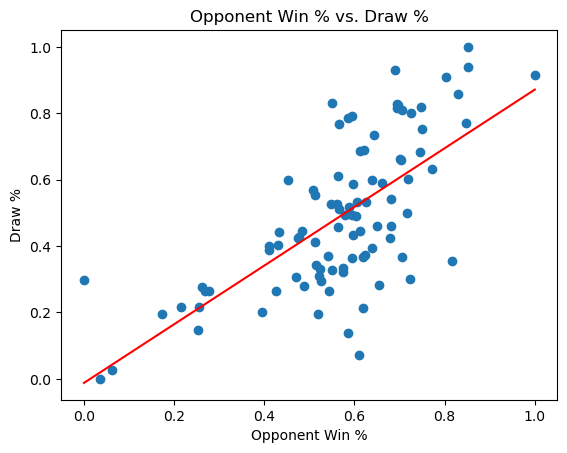

In [2049]:
import numpy as np

plt.title("Opponent Win % vs. Draw %")
plt.xlabel("Opponent Win %")
plt.ylabel("Draw %")
plt.scatter(data['Opponent Win %'], data['Draw %'])
plt.plot(np.unique(data['Opponent Win %']), np.poly1d(np.polyfit(data['Opponent Win %'], data['Draw %'], 1))(np.unique(data['Opponent Win %'])), color='red')


In [2050]:
from scipy.stats import pearsonr

corr = pearsonr(data['Opponent Win %'], data['Draw %'])
print(corr)

PearsonRResult(statistic=0.6870656552223079, pvalue=2.862711958416631e-14)


In [2051]:
coor = pearsonr(data['DeltaPerf'], data['Draw %'])
print(coor)


PearsonRResult(statistic=0.1564169957545694, pvalue=0.1343250139791142)


PearsonRResult(statistic=-0.39519547741098837, pvalue=8.83928925771111e-05)


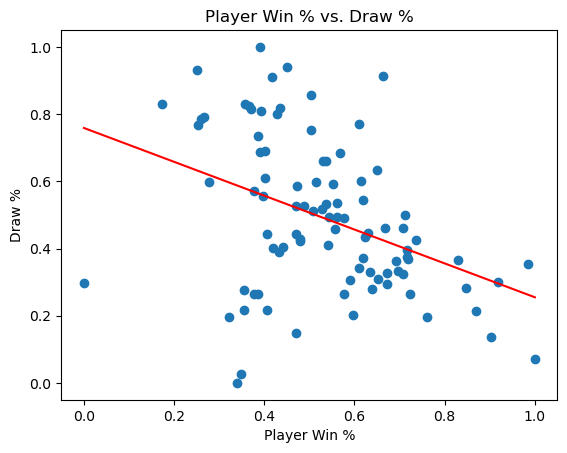

In [2052]:
plt.title("Player Win % vs. Draw %")
plt.xlabel("Player Win %")
plt.ylabel("Draw %")
plt.scatter(data['Player Win %'], data['Draw %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Draw %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Draw %'])
print(coor)

PearsonRResult(statistic=0.39591112918320925, pvalue=8.559628397478799e-05)


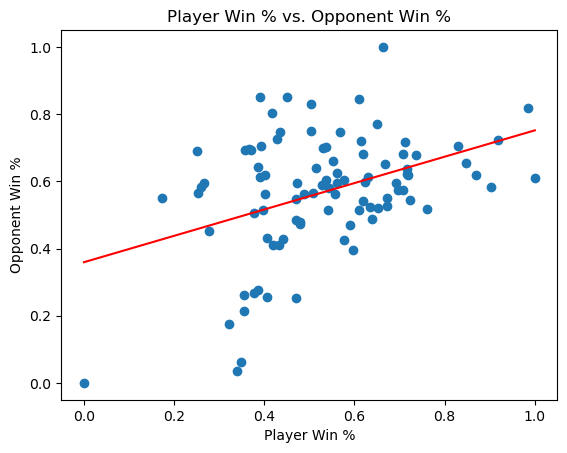

In [2053]:
plt.title("Player Win % vs. Opponent Win %")
plt.xlabel("Player Win %")
plt.ylabel("Opponent Win %")
plt.scatter(data['Player Win %'], data['Opponent Win %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Opponent Win %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Opponent Win %'])
print(coor)

In [2054]:
import statsmodels.api as sm

model = sm.OLS(data['Player Win %'], sm.add_constant(data['Draw %']))
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.84
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.84e-05
Time:                        16:19:34   Log-Likelihood:                 36.293
No. Observations:                  93   AIC:                            -68.59
Df Residuals:                      91   BIC:                            -63.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6849      0.041     16.783      0.0

In [2055]:
model = sm.OLS(data['Player Win %'], sm.add_constant(data['Opponent Win %']))
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.92
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.56e-05
Time:                        16:19:34   Log-Likelihood:                 36.324
No. Observations:                  93   AIC:                            -68.65
Df Residuals:                      91   BIC:                            -63.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3059      0.058      5.

In [2056]:
# multiple regression analysis

model = sm.OLS(data['Player Win %'], sm.add_constant(data[['Draw %', 'Opponent Win %']]))
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.488e+06
Date:                Sun, 05 May 2024   Prob (F-statistic):          4.28e-204
Time:                        16:19:34   Log-Likelihood:                 512.28
No. Observations:                  93   AIC:                            -1019.
Df Residuals:                      90   BIC:                            -1011.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2939      0.000    843.

PearsonRResult(statistic=0.48402076184399795, pvalue=8.861654387954353e-07)


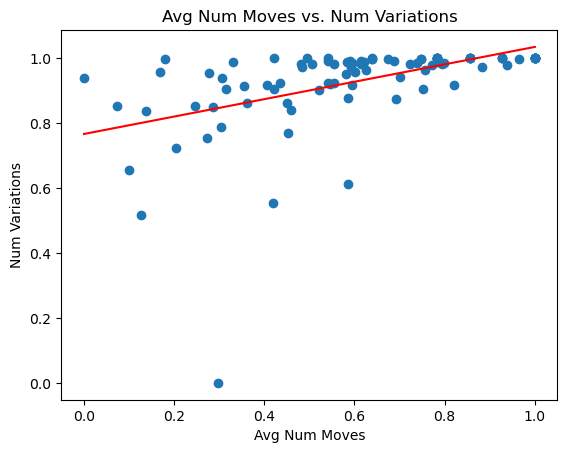

In [2057]:
plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

coor = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(coor)

PearsonRResult(statistic=0.5471878958641806, pvalue=2.8813028407624773e-08)


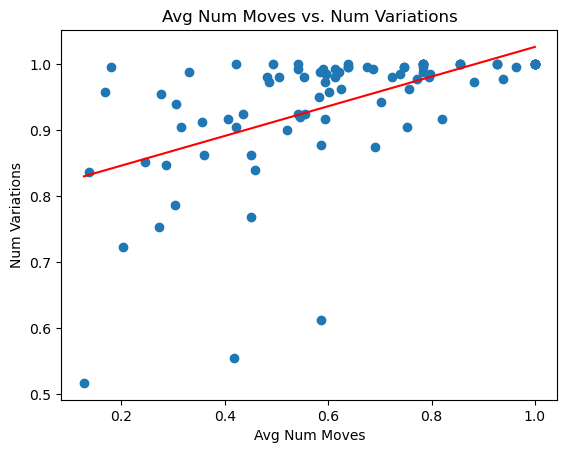

In [2058]:
# Remove outlier data points
data = data[(data['Avg Num Moves'] > 0.1) & (data['Num Variations'] > 0.1)]

# Calculate the correlation between 'Avg Num Moves' and 'Num Variations'
corr = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(corr)

plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

In [2059]:
# Avg Num Moves and Num Variations are not higly correlated and the p-value is very significant, we will use this two variable to create a sub-indicator "Complexity"

# Calculate the complexity of the opening
weight = 0.5
data['Complexity'] = weight * data['Avg Num Moves'] + weight * data['Num Variations']

In [2060]:
# Calculate the Effectivness indicator of the opening
weight = {'Player Win %': 0.5, 'Opponent Win %': 0.3, 'Draw %': 0.2}
data['Effectivness'] = 0
for column in weight.keys():
    data['Effectivness'] += weight[column] * data[column]

In [2061]:
# Add the popularity index
data['Popularity'] = data['Log Num Games']

# Add Improvement Index
data['Improvement'] = data['DeltaPerf']

In [2062]:
#drop the columns that are not needed
data.drop(columns=['Num Games', 'Perf Rating', 'Player Win %', 'Draw %', 'Opponent Win %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf', 'Avg Player', 'Log Num Games'], inplace=True)

# save The Three indicators to a new CSV file
data.to_csv('archive/indicators.csv', index=False)

Text(0.5, 1.0, 'Correlation Matrix of the Three Indicators')

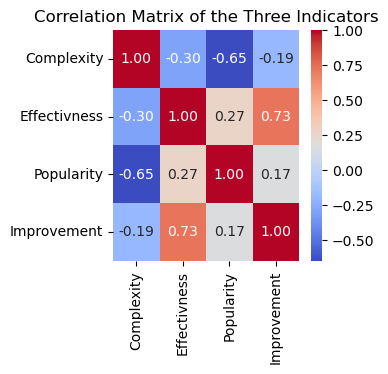

In [2063]:
# Multivariate analysis with the three indicators

data = pd.read_csv('archive/indicators.csv')

# Columns for the multivariate analysis
multivariate_data = data[['Complexity', 'Effectivness', 'Popularity', 'Improvement']]

# Correlation matrix
corr_matrix = multivariate_data.corr()

# Heatmap
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the Three Indicators')






PearsonRResult(statistic=-0.2960289346865354, pvalue=0.004852338413095879)


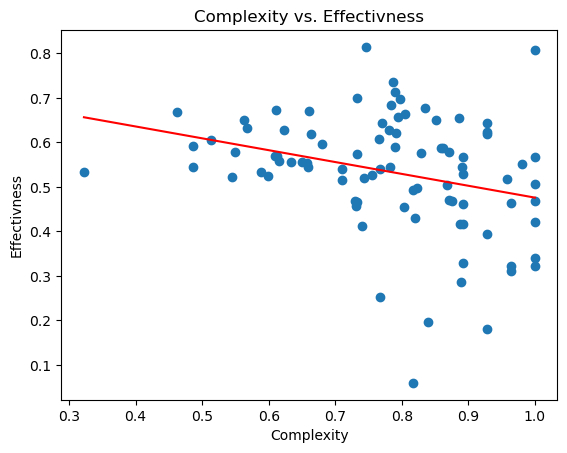

In [2064]:
plt.title("Complexity vs. Effectivness")
plt.xlabel("Complexity")
plt.ylabel("Effectivness")
plt.scatter(data['Complexity'], data['Effectivness'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Effectivness'], 1))(np.unique(data['Complexity'])), color='red') 

# Calculate the correlation between 'Complexity' and 'Effectivness'
corr = pearsonr(data['Complexity'], data['Effectivness'])
print(corr)

PearsonRResult(statistic=-0.6477469275201161, pvalue=6.8538683276530425e-12)


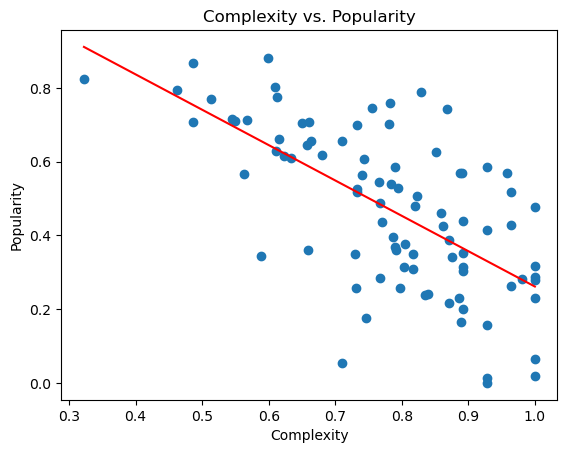

In [2065]:
plt.title("Complexity vs. Popularity")
plt.xlabel("Complexity")
plt.ylabel("Popularity")
plt.scatter(data['Complexity'], data['Popularity'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Popularity'], 1))(np.unique(data['Complexity'])), color='red')

# Calculate the correlation between 'Complexity' and 'Popularity'
corr = pearsonr(data['Complexity'], data['Popularity'])
print(corr)

PearsonRResult(statistic=-0.18526818811280021, pvalue=0.08217728540773885)


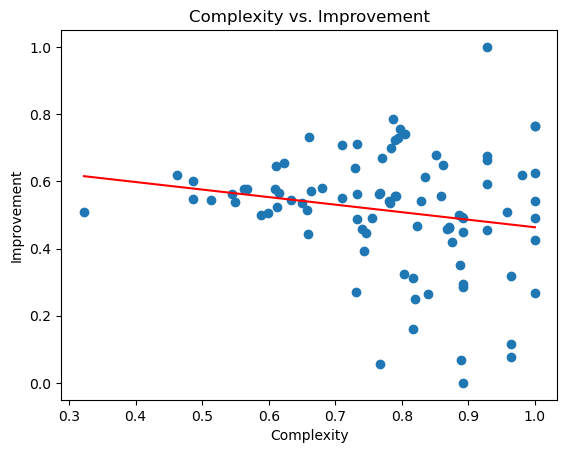

In [2066]:
plt.title("Complexity vs. Improvement")
plt.xlabel("Complexity")
plt.ylabel("Improvement")
plt.scatter(data['Complexity'], data['Improvement'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Improvement'], 1))(np.unique(data['Complexity'])), color='red')

# Calculate the correlation between 'Complexity' and 'Improvement'
corr = pearsonr(data['Complexity'], data['Improvement'])
print(corr)

PearsonRResult(statistic=0.26692927121745164, pvalue=0.01144966463920875)


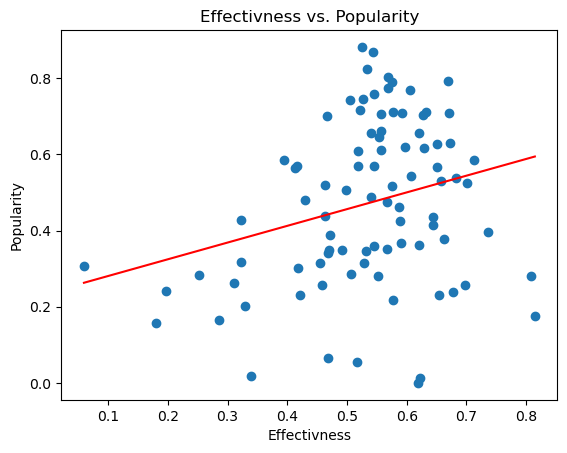

In [2067]:
plt.title("Effectivness vs. Popularity")
plt.xlabel("Effectivness")
plt.ylabel("Popularity")
plt.scatter(data['Effectivness'], data['Popularity'])
plt.plot(np.unique(data['Effectivness']), np.poly1d(np.polyfit(data['Effectivness'], data['Popularity'], 1))(np.unique(data['Effectivness'])), color='red')

# Calculate the correlation between 'Effectivness' and 'Popularity'
corr = pearsonr(data['Effectivness'], data['Popularity'])
print(corr)

PearsonRResult(statistic=0.7283941519169261, pvalue=6.000137362478711e-16)


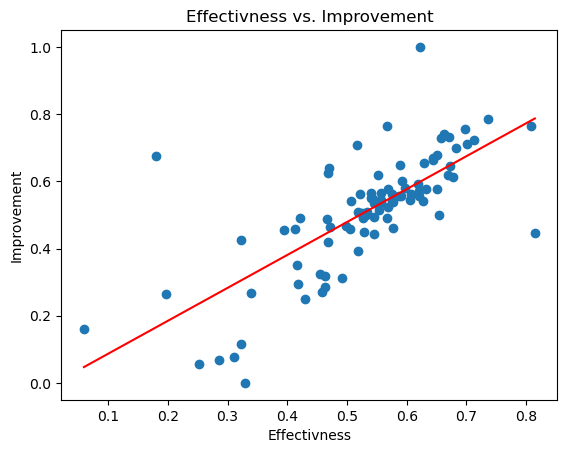

In [2068]:
plt.title("Effectivness vs. Improvement")
plt.xlabel("Effectivness")
plt.ylabel("Improvement")
plt.scatter(data['Effectivness'], data['Improvement'])
plt.plot(np.unique(data['Effectivness']), np.poly1d(np.polyfit(data['Effectivness'], data['Improvement'], 1))(np.unique(data['Effectivness'])), color='red')

# Calculate the correlation between 'Effectivness' and 'Improvement'
corr = pearsonr(data['Effectivness'], data['Improvement'])
print(corr)

In [2069]:
# Remove improvement

data.drop(columns=['Improvement'], inplace=True)

# Create the Overall index
weight = {'Complexity': 0.33, 'Effectivness': 0.33, 'Popularity': 0.34}
weight_beginer = {'Complexity': 0.6, 'Effectivness': 0.2, 'Popularity': 0.2}
weight_advanced = {'Complexity': 0.2, 'Effectivness': 0.5, 'Popularity': 0.3}

data['Overall'] = 0
for column in weight.keys():
    data['Overall'] += weight[column] * data[column]

data['OverallBeginer'] = 0
for column in weight_beginer.keys():
    data['OverallBeginer'] += weight_beginer[column] * data[column]

data['OverallAdvanced'] = 0
for column in weight_advanced.keys():
    data['OverallAdvanced'] += weight_advanced[column] * data[column]



# Save the final data to a new CSV file
data.to_csv('archive/final_data.csv', index=False)

# Display the 5 best openings based on the Overall index
print(data.sort_values(by='Overall', ascending=False).head(5))

# save the top 10 openings to a new CSV file
data.sort_values(by='Overall', ascending=False).head(10).to_csv('archive/top10_openings.csv', index=False)



         Opening Name  Complexity  Effectivness  Popularity   Overall  \
30        Indian Game    0.828658      0.575117    0.790165  0.754854   
20    English Opening    0.598895      0.524501    0.882125  0.753954   
24     French Defense    0.486672      0.544207    0.867749  0.726825   
88  Zukertort Opening    0.868536      0.504602    0.743797  0.720905   
63    Queen Pawn Game    0.783007      0.544450    0.758208  0.720416   

    OverallBeginer  OverallAdvanced  
30        0.770251         0.690340  
20        0.640662         0.646667  
24        0.574395         0.629763  
88        0.770801         0.649147  
63        0.730336         0.656289  


In [2070]:
# Display the 5 best openings based on the Overall index for beginer
print(data.sort_values(by='OverallBeginer', ascending=False).head(5))

           Opening Name  Complexity  Effectivness  Popularity   Overall  \
64   Queen Pawn Opening    1.000000      0.808277    0.279661  0.529452   
39  King's Pawn Opening    1.000000      0.566251    0.475938  0.598813   
50  Nimzo-Larsen Attack    0.957590      0.517942    0.569356  0.636720   
28      Horwitz Defense    0.963830      0.463978    0.518320  0.596554   
88    Zukertort Opening    0.868536      0.504602    0.743797  0.720905   

    OverallBeginer  OverallAdvanced  
64        0.817588         0.688037  
39        0.808438         0.625907  
50        0.792014         0.621296  
28        0.774758         0.580251  
88        0.770801         0.649147  


In [2071]:
# Display the 5 best openings based on the Overall index for advanced
print(data.sort_values(by='OverallAdvanced', ascending=False).head(5))

            Opening Name  Complexity  Effectivness  Popularity   Overall  \
30           Indian Game    0.828658      0.575117    0.790165  0.754854   
82          Torre Attack    0.789842      0.712756    0.586265  0.652278   
64    Queen Pawn Opening    1.000000      0.808277    0.279661  0.529452   
83     Trompowsky Attack    0.851842      0.650538    0.627318  0.676867   
37  King's Indian Attack    0.780151      0.627747    0.702177  0.702886   

    OverallBeginer  OverallAdvanced  
30        0.770251         0.690340  
82        0.733709         0.690226  
64        0.817588         0.688037  
83        0.766676         0.683833  
37        0.734076         0.680557  


In [2072]:
from sklearn.cluster import KMeans

# Assuming your data is stored in a CSV file
data = pd.read_csv('archive/final_data.csv')

# Ensure that the index is appropriately named; this example assumes the column is named 'Overall Index'
print(df.head())  # Check the first few rows to confirm data is loaded correctly


                                             Opening Colour  Num Games  \
0                 Alekhine Defense, Balogh Variation  white        692   
1               Alekhine Defense, Brooklyn Variation  black        228   
2               Alekhine Defense, Exchange Variation  white       6485   
3                Alekhine Defense, Four Pawns Attack  white        881   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259   

   Perf Rating  Avg Player  Player Win %  Draw %  Opponent Win %  Num Moves  \
0         2247        2225          40.8    24.3            35.0          7   
1         2145        2193          29.8    22.4            47.8          4   
2         2244        2194          40.8    27.7            31.5          9   
3         2187        2130          39.7    23.2            37.1          9   
4         2122        2178          37.8    21.2            40.9         10   

       Opening Name                                Variation  
0  Alekhine Defen

/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

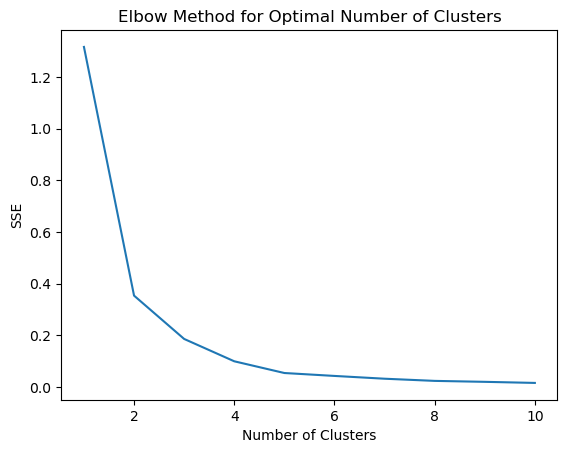

In [2073]:
# Calculate the sum of squared distances for different numbers of clusters (e.g., 1-10)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Overall']])
    sse[k] = kmeans.inertia_  # Sum of squared distances

# Plot SSE values to find the elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()


In [2074]:
# Replace 'optimal_k' with the number of clusters chosen based on the Elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['Overall']])


/Users/alexd/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2075]:
# Examine cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Statistical summary of the index for each cluster
cluster_summary = data.groupby('Cluster')['Overall'].describe()
print(cluster_summary)


Cluster Centers:
[[0.35981658]
 [0.50372017]
 [0.6548822 ]]
         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0         17.0  0.359817  0.050749  0.278021  0.317522  0.360036  0.413040   
1         31.0  0.503720  0.044751  0.440341  0.463821  0.501811  0.543142   
2         41.0  0.654882  0.045892  0.582215  0.617465  0.643466  0.691664   

              max  
Cluster            
0        0.431411  
1        0.571587  
2        0.754854  


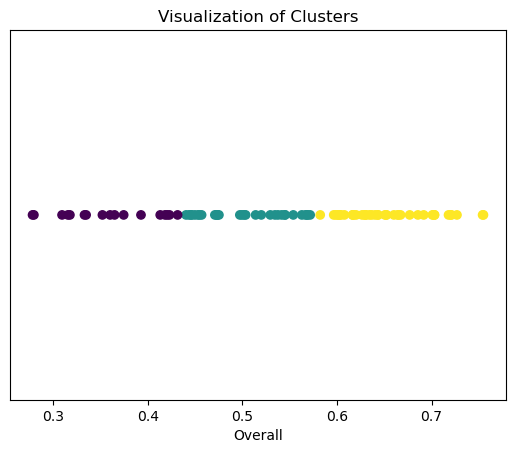

In [2077]:
plt.figure()
plt.scatter(data['Overall'], [0]*len(data), c=data['Cluster'], cmap='viridis')
plt.title("Visualization of Clusters")
plt.xlabel("Overall")
plt.yticks([])  # Hide y-axis as it's not meaningful in this one-dimensional plot
plt.show()


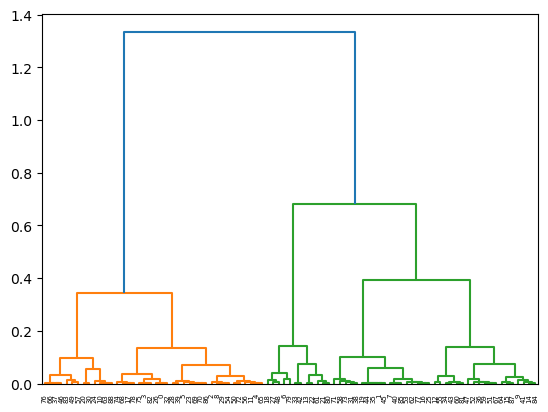

In [2078]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(data[['Overall']], method='ward'))